In [34]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import math
import matplotlib.pyplot as plt
import random as rnd

In [35]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [36]:
train.Name = train.Name.apply(lambda x: x.split(',')[1].split(' ')[1]).astype(str)
test.Name = test.Name.apply(lambda x: x.split(',')[1].split(' ')[1]).astype(str)

In [37]:
#print(train.Name.value_counts())
#print(train.Name.unique()[4:])
train.Name = train.Name.replace(['Don.','Rev.' ,'Dr.', 'Mme.', 'Ms.','Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.','Capt.', 'the' ,'Jonkheer.'],'Rare')
#print(train.Name.value_counts())

In [38]:
train.Sex = train.Sex.map({'female':1,'male':0}).astype(int)

In [39]:
map_Name = {'Mr.':1,'Miss.':2,'Mrs.':3,'Master.':4,'Rare':5}
train.Name = train.Name.map(map_Name)
print(train.Name.value_counts())

1    517
2    182
3    125
4     40
5     27
Name: Name, dtype: int64


In [40]:
ages_new = np.zeros((2,3))

for i in range(0,2):
    for j in range(0,3):
        aux = train[(train.Sex==i)& (train.Pclass == j+1)]['Age'].dropna()
        age_mean = aux.mean()
        age_std = aux.std()
        mx = aux.max()
        age_possible = rnd.uniform(max(age_mean-age_std,0),min(age_mean+age_std,mx))
        ages_new[i,j] = int(age_possible)
for i in range(0,2):
    for j in range(0,3):
        train.loc[(train.Age.isnull()) & (train.Sex==i) & (train.Pclass == j+1),'Age'] = ages_new[i,j]
train.Age = train.Age.astype(int)

In [41]:
train["AgeBand"] = pd.cut(train['Age'], 5) # check proportion of Survived, 50 50 is better
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.394015
2,"(32.0, 48.0]",0.321799
3,"(48.0, 64.0]",0.388889
4,"(64.0, 80.0]",0.090909


In [42]:
train.Embarked = train.Embarked.fillna('S') # type S: 644 occurrences
train = train.drop(columns=['Ticket','Cabin']) # To much null's

In [43]:
train.loc[(train["Age"]<=16),'Age'] = 0
train.loc[(train["Age"]>16) & (train["Age"]<=32),'Age'] = 1
train.loc[(train["Age"]>32) & (train["Age"]<=48),'Age'] = 2
train.loc[(train["Age"]>48) & (train["Age"]<=64),'Age'] = 3
train.loc[(train["Age"]>64),'Age'] = 4


In [44]:
map_Embarked = {'S':1,'C':2,'Q':3}
train.Embarked = train.Embarked.map(map_Embarked)

In [45]:
train["FareBand"] = pd.cut(train['Fare'], 4) # check proportion of Survived, 50 50 is better
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [46]:
train.loc[(train["Fare"]<=128.082),'Fare'] = 0
train.loc[(train["Fare"]>128.082) & (train["Fare"]<=256.165),'Fare'] = 1
train.loc[(train["Fare"]>256.165) & (train["Fare"]<=384.247),'Fare'] = 2
train.loc[(train["Fare"]>384.247),'Fare'] = 3
train.Fare = train.Fare.astype(int)

In [47]:
train = train.drop(columns=["FareBand","AgeBand"])
print(train.head())

   PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Fare  Embarked
0            1         0       3     1    0    1      1      0     0         1
1            2         1       1     3    1    2      1      0     0         2
2            3         1       3     2    1    1      0      0     0         1
3            4         1       1     3    1    2      1      0     0         1
4            5         0       3     1    0    2      0      0     0         1


In [48]:
y_train = train.Survived
train = train.drop(columns=['Survived','PassengerId'])

In [49]:
#print(test.Name.value_counts())
#print(test.Name.unique()[4:])
test.Name = test.Name.replace(['Ms.','Col.', 'Rev.', 'Dr.', 'Dona.'],'Rare')
print(test.Name.value_counts())

Mr.        240
Miss.       78
Mrs.        72
Master.     21
Rare         7
Name: Name, dtype: int64


In [50]:
test.Sex = test.Sex.map({'female':1,'male':0}).astype(int)
test.Embarked = test.Embarked.map(map_Embarked)
test.Name = test.Name.map(map_Name)

In [51]:
ages_new = np.zeros((2,3))

for i in range(0,2):
    for j in range(0,3):
        aux = test[(test.Sex==i)& (test.Pclass == j+1)]['Age'].dropna()
        age_mean = aux.mean()
        age_std = aux.std()
        mx = aux.max()
        age_possible = rnd.uniform(max(age_mean-age_std,0),min(age_mean+age_std,mx))
        ages_new[i,j] = int(age_possible)
for i in range(0,2):
    for j in range(0,3):
        test.loc[(test.Age.isnull()) & (test.Sex==i) & (test.Pclass == j+1),'Age'] = ages_new[i,j]
test.Age = test.Age.astype(int)
print(test.Age.isnull().sum())

0


In [52]:
print(test.Fare.mean())
test.Fare = test.Fare.fillna(test.Fare.mean())

35.6271884892086


In [53]:
passengerld = test['PassengerId'].astype(int)
test = test.drop(columns=['PassengerId','Cabin','Ticket'])

In [54]:
print(test.head())

   Pclass  Name  Sex  Age  SibSp  Parch     Fare  Embarked
0       3     1    0   34      0      0   7.8292         3
1       3     3    1   47      1      0   7.0000         1
2       2     1    0   62      0      0   9.6875         3
3       3     1    0   27      0      0   8.6625         1
4       3     3    1   22      1      1  12.2875         1


In [55]:
test.loc[(test["Age"]<=16),'Age'] = 0
test.loc[(test["Age"]>16) & (test["Age"]<=32),'Age'] = 1
test.loc[(test["Age"]>32) & (test["Age"]<=48),'Age'] = 2
test.loc[(test["Age"]>48) & (test["Age"]<=64),'Age'] = 3
test.loc[(test["Age"]>64),'Age'] = 4
test.loc[(test["Fare"]<=128.082),'Fare'] = 0
test.loc[(test["Fare"]>128.082) & (test["Fare"]<=256.165),'Fare'] = 1
test.loc[(test["Fare"]>256.165) & (test["Fare"]<=384.247),'Fare'] = 2
test.loc[(test["Fare"]>384.247),'Fare'] = 3
test.Fare = test.Fare.astype(int)

In [56]:
print(test.head())
print(train.head())

   Pclass  Name  Sex  Age  SibSp  Parch  Fare  Embarked
0       3     1    0    2      0      0     0         3
1       3     3    1    2      1      0     0         1
2       2     1    0    3      0      0     0         3
3       3     1    0    1      0      0     0         1
4       3     3    1    1      1      1     0         1
   Pclass  Name  Sex  Age  SibSp  Parch  Fare  Embarked
0       3     1    0    1      1      0     0         1
1       1     3    1    2      1      0     0         2
2       3     2    1    1      0      0     0         1
3       1     3    1    2      1      0     0         1
4       3     1    0    2      0      0     0         1


In [57]:
## New columns
train['Sex*Name'] = train.Age*train.Sex
test['Sex*Name'] = test.Age*train.Sex

In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train, y_train)
y_pred = regressor.predict(test)
acc_regressor = round(regressor.score(train,y_train)*100,2)
print(acc_regressor)

42.23


In [59]:
ids = []
res = []
for i in range(len(test.index)):
    idx = passengerld[i]
    ids+= [idx]
    res+= [1] if y_pred[i]>0.5 else [0]

In [60]:
sub = pd.DataFrame(np.column_stack((ids, res)), columns=['PassengerId', 'Survived'])
sub.to_csv('submit.csv',index=False)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


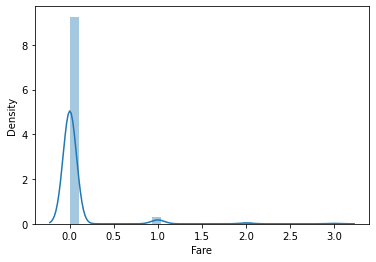

In [61]:
sns.distplot(train.Fare)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


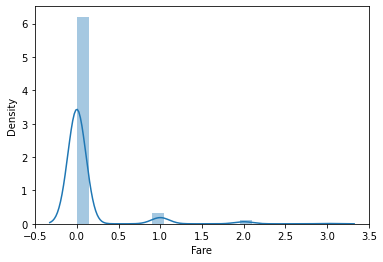

In [62]:
sns.distplot(test.Fare)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


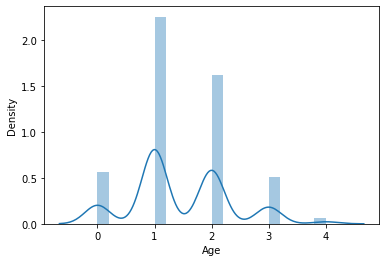

In [63]:
sns.distplot(train.Age)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


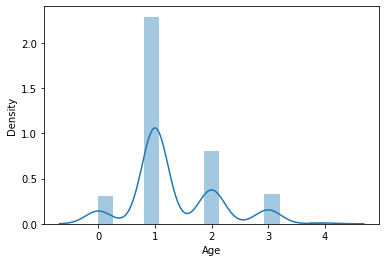

In [64]:
sns.distplot(test.Age)
plt.show()

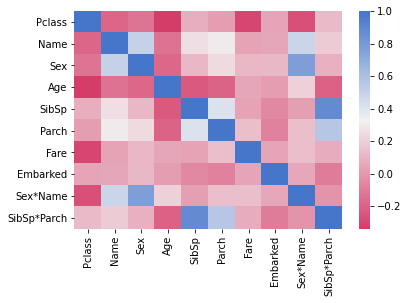

In [65]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
correlations = train.corr() 
sns.heatmap(correlations, cmap=cmap)
plt.show()